# Dataset Description

- **Dataset_Treino.csv:** Base para treino do modelo contendo todos os dados disponibilizados para os alunos e a coluna indicando se aquele aluno abandonou o curso antes de terminá-lo

- **Dataset_Resposta.csv:** Base com informações de matrículas correntes que deve ser usada para prever se os alunos irão abandonar o curso. A coluna de ID_Aluno deste dataset, junto com a coluna de Abandono_curso calculada pelo modelo desenvolvido, devem compor o arquivo de submissão.

- **Sample_Submission.csv:** Arquivo que exemplifica o formato exato que o arquivo de submissão deve ter, com as duas colunas de ID_Aluno e Abandono_curso separadas por vírgulas. Ele deve ter uma linha de cabeçalho, mais 1594 linhas contendo o ID de cada aluno no Dataset_Resposta.csv e a previsão de Abandono_curso. A coluna de Abandono_curso do Sample_Submission.csv está em branco, mas deverá ser preenchida com 1 e 0 (abandona e não abandona, respectivamente) nos arquivos de submissão das equipes.


## Descrição dos campos
Todas as colunas de Idade até Horario_Estudando são fornecidas pelo aluno ao preencher o formulário de inscrição no curso. Por isso, podem haver campos em branco ou com preenchimento inesperado nos datasets.

- **ID_Aluno:** Número de identificação de cada aluno. Será a chave usada para relacionar a previsão do arquivo resposta
Idade: Idade do aluno no momento da matrícula
- **Tipo_escola:** Tipo de escola/faculdade em que ele estuda ou estudou
- **Escolaridade:** Nível de escolaridade e status atual
- **Estado:** Estado de residência do aluno
- **Municipio:** Município de residência do aluno
- **Trabalhando:** Se está trabalhando atualmente
- **Estudando:** Se está estudando atualmente
- **Concluiu_EAD:** Se já conclui curso à distância alguma vez e de que forma estudou à distância
- **Aprender_EAD:** Capacidade que aluno julga ter de aprender com EAD (Educação à Distância)
- **Recursos:** Quais recursos o aluno tem disponível individualmente ou em sua casa para estudar à distância
- **Disponibilidade_Tutoria:** Disponibilidade declarada para participar das tutorias. Tutorias são sessões presenciais que acontecem ao longo do curso, sendo 12 no total. Não é obrigatória a participação em todas, mas é altamente recomendável que cada aluno participe de boa parte delas.
- **Disponibilidade_3_Meses:** Disponibilidade declarada de esperar os 3 meses de curso antes de procurar um novo ou um outro emprego
- **Pessoas_Casa:** Quantas pessoas residem na mesma casa que o aluno mora
- **Renda_Familiar:** Renda familiar, estimada pelo aluno
- **Conheceu_PROA:** Canal pelo qual conheceu o PROA
- **Horario_Estudando:** Qual período do dia a pessoa está estudando. Há opção para quem não está mais estudando

As colunas a partir de Data_Inscrição são fornecidas e calculadas pela administração do Processo Seletivo do PROA.

- **Data_Inscrição:** Data na qual o aluno fez a inscrição para participar do curso
- **Dias_Espera_Aprovacao:** Dias de espera entre a data da inscrição e da aprovação no Processo Seletivo
- **Dias_Espera_Inicio:** Dias de espera entre a data da inscrição e de início do curso
- **Abandono_curso:** Variável resposta presente apenas no dataset de treinamento. Indica se aquele aluno abandonou o curso antes do fim

# Main Libraries

In [148]:
# numerical and data processing
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# models

import warnings
warnings.filterwarnings("ignore")

# Sobre os arquivos (.csv)

In [13]:
# verificando os arquivos no diretório atual do sistema
!ls

Dataset_Resposta.csv  desafio-visagio-2023.ipynb
Dataset_Treino.csv    Sample_Submission.csv


Com base na descrição fornecida pelo metadata, teremos a seguinte relação:
- Dataset_Resposta: não contém nosso target ('Abandono_curso'), logo este será utilizado apenas como dataset de validação, sem a possibilidade de extrair métricas de desempenho em cima dele (ou seja, a inferência feita nesta base é tida como aceitável do modelo otimizado).
- Dataset_Treino: este sim possui a coluna de interesse (target). Portanto, em cima dele iremos dividir nossos dados em treino/teste. Além disso, com ele podemos avaliar e otimizar a resposta do modelo.
- Sample_Submission: contém apenas ID_Aluno e Abandono_curso. Portanto iremos posteriormente, na última etapa antes do envio, utilizar o método "iloc" em cima do Dataset_Resposta para obter os valores estimados/inferidos da coluna Abandono_curso e submeter no formato esperado

# Carregando os dados

## 1. Dataset_Treino

Iremos carregar o Dataset_Treino, mas para facilitar iremos renomeá-lo para "df_base" para indicar que ele é o dataset base do nosso modelo e em cima dele poderão ser retiradas as amostras ou conjunto de dados para treino e teste do modelo

In [169]:
df_base=pd.read_csv('Dataset_Treino.csv')
df_base.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0
2,3,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0
3,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0
4,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0


In [55]:
df_base.shape

(3738, 21)

In [56]:
# verificando os dTypes
df_base.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Aluno                 3738 non-null   int64  
 1   Idade                    3738 non-null   int64  
 2   Tipo_escola              3738 non-null   object 
 3   Escolaridade             3738 non-null   object 
 4   Estado                   3738 non-null   object 
 5   Municipio                3727 non-null   object 
 6   Trabalhando              3738 non-null   object 
 7   Estudando                3733 non-null   object 
 8   Concluiu_EAD             3736 non-null   object 
 9   Aprender_EAD             3738 non-null   object 
 10  Recursos                 3734 non-null   object 
 11  Disponibilidade_Tutoria  3738 non-null   object 
 12  Disponibilidade_3_Meses  3738 non-null   object 
 13  Pessoas_Casa             3738 non-null   object 
 14  Renda_Familiar          

In [57]:
# contagem de nulos
pd.DataFrame({
    'nome_coluna':df_base.isna().sum().index,
    'contagem_nulos':df_base.isna().sum().values,
    'percentual_nulos':[round(100*v/df_base.shape[0],4) for v in df_base.isna().sum().values]
})

,nome_coluna,contagem_nulos,percentual_nulos
0,ID_Aluno,0,0.0000
1,Idade,0,0.0000
2,Tipo_escola,0,0.0000
3,Escolaridade,0,0.0000
4,Estado,0,0.0000
5,Municipio,11,0.2943
6,Trabalhando,0,0.0000
7,Estudando,5,0.1338
8,Concluiu_EAD,2,0.0535
9,Aprender_EAD,0,0.0000


Como a porcentagem de Nulos é muito baixa em relação à base original (ou seja, consideravelmente abaixo de 1%), fazermos um "drop" dessas linhas com informações faltantes não deve afetar a resposta de um modelo (quando bem treinado). Desta forma, para facilitar a mudança dos dTypes (inicialmente carregados como "object") e também para simplificar o processo de evitar fazer inferências com viés para popular dados que vieram faltando, iremos simplesmente desconsiderar essa amostra.

In [170]:
# dropando os nulos e verificando alterações
shapeOld=df_base.shape #dimensão antiga

df_base=df_base.dropna(axis=0,how='any') #drop de linhas
shapeRefactored=df_base.shape #dimensão nova

print('\nnome_coluna\tnova_contagem_nulos\n') 
print(df_base.isna().sum()) #verificando alterações

# métricas de perda
print(f'\n>> Quantidade de linhas descartadas: {shapeOld[0]-shapeRefactored[0]}')
print(f'>> Aprox. {round(100*(shapeOld[0]-shapeRefactored[0])/shapeOld[0],3)}% de dados perdidos','\n')


nome_coluna	nova_contagem_nulos

ID_Aluno                   0
Idade                      0
Tipo_escola                0
Escolaridade               0
Estado                     0
Municipio                  0
Trabalhando                0
Estudando                  0
Concluiu_EAD               0
Aprender_EAD               0
Recursos                   0
Disponibilidade_Tutoria    0
Disponibilidade_3_Meses    0
Pessoas_Casa               0
Renda_Familiar             0
Conheceu_PROA              0
Horario_Estudando          0
Data_Inscrição             0
Dias_Espera_Aprovacao      0
Dias_Espera_Inicio         0
Abandono_curso             0
dtype: int64

>> Quantidade de linhas descartadas: 22
>> Aprox. 0.589% de dados perdidos 



Alterando os dTypes

In [172]:
# changing to datetime
df_base['Data_Inscrição'] = pd.to_datetime(df_base['Data_Inscrição'], format='%d/%m/%Y')

# using dictionary to convert specific columns
convert_dict = {'Tipo_escola': pd.CategoricalDtype(),
                'Escolaridade': pd.CategoricalDtype(),
                'Estado': pd.CategoricalDtype(),
                'Municipio': pd.CategoricalDtype(),
                'Trabalhando': pd.CategoricalDtype(),
                'Estudando': pd.CategoricalDtype(),
                'Concluiu_EAD': str,
                'Aprender_EAD': str,
                'Recursos': str,
                'Disponibilidade_Tutoria': pd.CategoricalDtype(),
                'Disponibilidade_3_Meses': pd.CategoricalDtype(),
                'Pessoas_Casa': 'str',
                'Renda_Familiar': str,
                'Conheceu_PROA': pd.CategoricalDtype(),
                'Horario_Estudando': pd.CategoricalDtype(),
                'Dias_Espera_Aprovacao': 'float64',
                'Dias_Espera_Inicio': 'int64',
                'Abandono_curso': 'bool'
                }

df_base = df_base.astype(convert_dict)
print(df_base.dtypes)

ID_Aluno                            int64
Idade                               int64
Tipo_escola                      category
Escolaridade                     category
Estado                           category
Municipio                        category
Trabalhando                      category
Estudando                        category
Concluiu_EAD                       object
Aprender_EAD                       object
Recursos                           object
Disponibilidade_Tutoria          category
Disponibilidade_3_Meses          category
Pessoas_Casa                       object
Renda_Familiar                     object
Conheceu_PROA                    category
Horario_Estudando                category
Data_Inscrição             datetime64[ns]
Dias_Espera_Aprovacao             float64
Dias_Espera_Inicio                  int64
Abandono_curso                       bool
dtype: object


## 2. Dataset_Resposta

Iremos carregar o Dataset_Resposta, mas para facilitar iremos renomeá-lo para "df_ans" para indicar que ele é o dataset resposta do nosso modelo e em cima dele deverá ser criada uma nova coluna resposta para a previsão final

In [173]:
df_ans=pd.read_csv('Dataset_Resposta.csv')
df_ans.head()

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio
0,7,20,public,Cursando o 3º ano do Ensino Médio,SP,Jacareí,Não,Não,Sim e fiz totalmente pelo computador,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,15/09/2022,0.0,123
1,8,17,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Eu prefiro cursos presenciais,Celular próprio,Sim,Sim,7,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Indicação de ex-aluno do PROA ou atual,Noite,15/09/2022,8.0,123
2,9,19,public,Cursando o 3º ano do Ensino Médio,SC,Morro Grande,Não,Sim,Sim e fiz totalmente pelo computador,Eu prefiro cursos presenciais,Computador/Celular próprio/Internet wifi,Sim,Sim,3,Entre 3 e 4 salários mínimos (R$3.300 – R$4.400),Instagram,Já concluí,15/09/2022,10.0,123
3,17,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Sim e fiz totalmente pelo computador,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi/Inter...,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Junior Achievement,Manhã,15/09/2022,1.0,123
4,18,21,public,Ensino Médio concluído e não estudando,SP,São Paulo,Não,Não,Nunca realizei um curso a distância,Não sei dizer,Celular próprio/Internet wifi,Sim,Sim,2,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Indicação de ex-aluno do PROA ou atual,Já concluí,15/09/2022,7.0,123


In [174]:
df_ans.shape

(1594, 20)

In [175]:
# verificando os dTypes
df_ans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Aluno                 1594 non-null   int64  
 1   Idade                    1594 non-null   int64  
 2   Tipo_escola              1594 non-null   object 
 3   Escolaridade             1594 non-null   object 
 4   Estado                   1594 non-null   object 
 5   Municipio                1594 non-null   object 
 6   Trabalhando              1594 non-null   object 
 7   Estudando                1594 non-null   object 
 8   Concluiu_EAD             1594 non-null   object 
 9   Aprender_EAD             1594 non-null   object 
 10  Recursos                 1594 non-null   object 
 11  Disponibilidade_Tutoria  1594 non-null   object 
 12  Disponibilidade_3_Meses  1594 non-null   object 
 13  Pessoas_Casa             1594 non-null   object 
 14  Renda_Familiar          

Alterando os dTypes

In [176]:
# changing to datetime
df_ans['Data_Inscrição'] = pd.to_datetime(df_ans['Data_Inscrição'], format='%d/%m/%Y')

# using dictionary to convert specific columns
convert_dict = {'Tipo_escola': pd.CategoricalDtype(),
                'Escolaridade': pd.CategoricalDtype(),
                'Estado': pd.CategoricalDtype(),
                'Municipio': pd.CategoricalDtype(),
                'Trabalhando': pd.CategoricalDtype(),
                'Estudando': pd.CategoricalDtype(),
                'Concluiu_EAD': str,
                'Aprender_EAD': str,
                'Recursos': str,
                'Disponibilidade_Tutoria': pd.CategoricalDtype(),
                'Disponibilidade_3_Meses': pd.CategoricalDtype(),
                'Pessoas_Casa': 'str',
                'Renda_Familiar': str,
                'Conheceu_PROA': pd.CategoricalDtype(),
                'Horario_Estudando': pd.CategoricalDtype(),
                'Dias_Espera_Aprovacao': 'float64',
                'Dias_Espera_Inicio': 'int64'
                }

df_ans = df_ans.astype(convert_dict)
print(df_ans.dtypes)

ID_Aluno                            int64
Idade                               int64
Tipo_escola                      category
Escolaridade                     category
Estado                           category
Municipio                        category
Trabalhando                      category
Estudando                        category
Concluiu_EAD                       object
Aprender_EAD                       object
Recursos                           object
Disponibilidade_Tutoria          category
Disponibilidade_3_Meses          category
Pessoas_Casa                       object
Renda_Familiar                     object
Conheceu_PROA                    category
Horario_Estudando                category
Data_Inscrição             datetime64[ns]
Dias_Espera_Aprovacao             float64
Dias_Espera_Inicio                  int64
dtype: object


# Análise Exploratória (EDA)

Para uma maior representatividade dos dados, nossa análise exploratória deverá levar em conta toda a base de dados (incluindo o Dataset_Treino e o Dataset_Resposta). Para isso, iremos criar um novo dataset resultante da concatenação entre os 2 mencionados anteriormente.

Lembrando que a etapa do EDA não deve interferir diretamente no modelo, isto é, qualquer dataset novo criado aqui não deverá ser levado em consideração no modelo de classificação (uma vez que ele terá como input exclusivamente o Dataset_Treino). A etapa de EDA serve apenas para auxiliar no processo de entendimento estatístico e da distribuição dos nossos dados, podendo fornecer insights para uma escolha adequada de modelos por exemplo.

In [111]:
# relembrando nossos dados...
df_base.head(2)

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,...,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,2022-09-15,0.0,123,True
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,2022-09-15,1.0,123,False


In [112]:
df_ans.head(2)

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio
0,7,20,public,Cursando o 3º ano do Ensino Médio,SP,Jacareí,Não,Não,Sim e fiz totalmente pelo computador,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Internet wifi,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,2022-09-15,0.0,123
1,8,17,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Eu prefiro cursos presenciais,Celular próprio,Sim,Sim,7,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Indicação de ex-aluno do PROA ou atual,Noite,2022-09-15,8.0,123


## Análise por Abando do curso

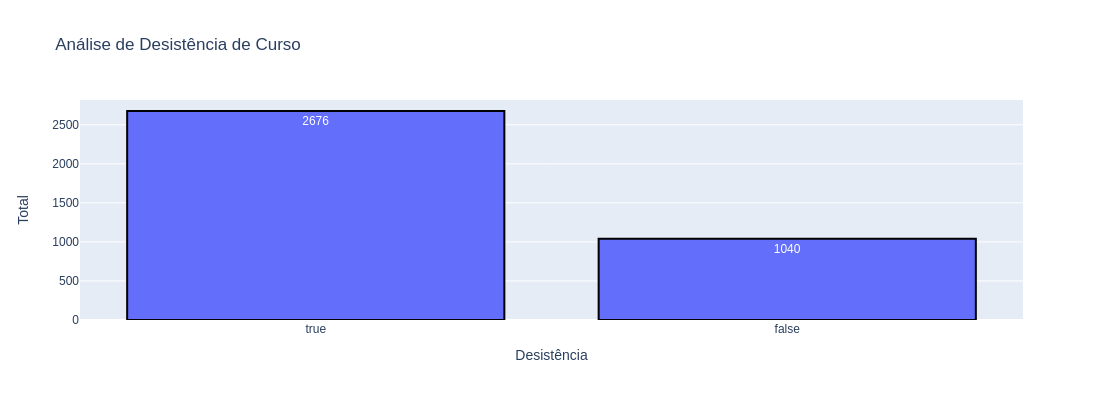

In [166]:
abandono=pd.DataFrame({
    'desistencia':df_base.Abandono_curso.value_counts().index,
    'total':df_base.Abandono_curso.value_counts().values
})

fig = px.bar(abandono, x='desistencia', y='total', title='Análise de Desistência de Curso',
             color_continuous_scale='Viridis',text_auto=True
            )

# Personalize a aparência do gráfico
fig.update_traces(marker_line_color='black', marker_line_width=2)  # Adiciona bordas pretas às barras
fig.update_layout(coloraxis_colorbar=dict(title='Desistência'),  # Legenda da escala de cores
                  xaxis_title='Desistência',  # Rótulo do eixo x
                  yaxis_title='Total',        # Rótulo do eixo y
                  width=800,height=400
                 )

fig.show()

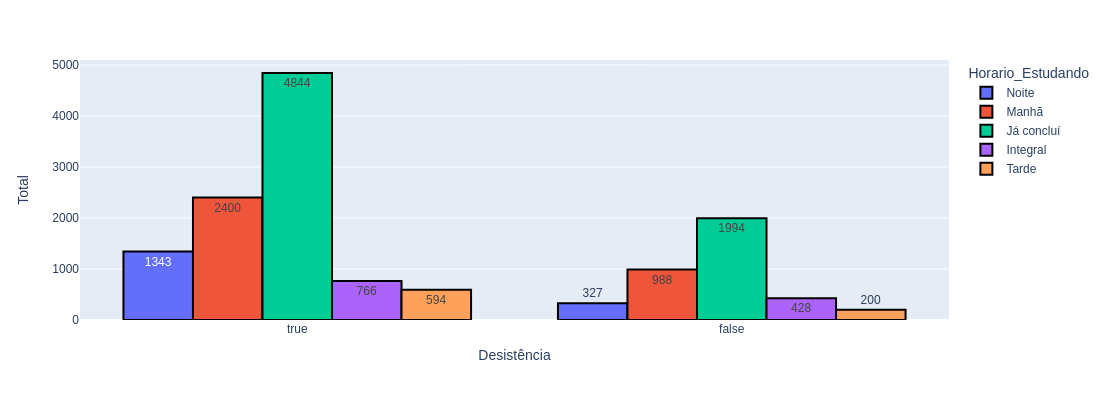

In [187]:
fig = px.histogram(df_base, x="Abandono_curso", y="Pessoas_Casa",
             color='Horario_Estudando', barmode='group',text_auto=True)

fig.update_traces(marker_line_color='black', marker_line_width=2)  # Adiciona bordas pretas às barras
fig.update_layout(coloraxis_colorbar=dict(title='Desistência'),  # Legenda da escala de cores
                  xaxis_title='Desistência',  # Rótulo do eixo x
                  yaxis_title='Total',        # Rótulo do eixo y
                  width=800,height=400
                 )

fig.show()